# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [2]:
# Initial Dataset Look @ columns

display(north_df.columns)

display(north_df.shape)

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

(245, 15)

In [3]:
# Total CSV Rows and Columns

north_df.shape

(245, 15)

In [4]:
# Sneak Peek First 5

north_df.head(5)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [5]:
# EDA Question 1A solution below:

# Query total north reps

north_reps = len(north_df["Rep ID"].unique())

print(f"** There are " + str(north_reps) + " call center reps in the North Branch **")

** There are 9 call center reps in the North Branch **


#### EDA Question 1B:  How many reps are in the South branch?  

In [6]:
# EDA Question 1B solution Below:

# Query total south reps

south_reps = len(south_df["Rep ID"].unique())

print(f"** There are " + str(south_reps) + " call center reps in the South Branch **")

** There are 11 call center reps in the South Branch **


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [7]:
# EDA Question 2A solution Below:

# Pivot table by branch and multiple columns to find average(mean) for north branch

pivot_table = north_df.pivot_table( index='Branch', 
                                    values=['Busy Minutes', 'Not Ready Minutes','Incoming Wait Time','During Call Wait Time'], 
                                    aggfunc={'mean'} ).round(2)
print(pivot_table)

       Busy Minutes During Call Wait Time Incoming Wait Time Not Ready Minutes
               mean                  mean               mean              mean
Branch                                                                        
North          9.99                  2.97               3.05              1.91


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [8]:
# EDA Question 2B solution Below:

# Pivot table by branch and multiple columns to find average(mean) for south branch

pivot_table = south_df.pivot_table( index='Branch', 
                                    values=['Busy Minutes', 'Not Ready Minutes','Incoming Wait Time','During Call Wait Time'], 
                                    aggfunc={'mean'} ).round(2)
print(pivot_table)

       Busy Minutes During Call Wait Time Incoming Wait Time Not Ready Minutes
               mean                  mean               mean              mean
Branch                                                                        
South         10.05                  3.08                3.0              1.91


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [9]:
# EDA Question 3 solution Below:

# Find the sum of the number of calls by time block for both north and south call centers

north_df["Time Block"].value_counts() + south_df["Time Block"].value_counts()

10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97

- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08

- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [10]:
# Question 1 solution below

north_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [11]:
south_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

#### Record your answer below:

> Your Answer: Yes there are records with missing data but I would expect some rows not to have incoming wait time if it wasn't an incoming call.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [12]:
# Cleaning Question 2 solution below:

# Find the Two 'values' for YES
north_df_sale = north_df['Sale'].unique()

# Remove the extra space from the column values
north_df['Sale'] = north_df['Sale'].str.rstrip() 

##### Record your answer by below:
> Your Answer: I needed to find the two values for yes. I used the unique method to find the values. Then, I removed the extra space using the rstrip() function

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [13]:
# Cleaning Question 3 solution below:

north_duplicates = north_df[north_df.duplicated(keep=False)]

display(print(north_duplicates))

south_duplicates = south_df[south_df.duplicated(keep=False)]

display(print(south_duplicates))

Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls]
Index: []


None

Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls]
Index: []


None

##### Record your answer below:
> Your Answer: N/A

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [14]:
# Cleaning Question 4 solution below:

# Drop any unnecessary Columns or Rows



##### Record your answer below:
> Your Answer: As of now I believe all the data may be necessary for visualizations or further insight. If it was unnecessary I would drop the data or create a subset of the data frame without the bloat information

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [15]:
# Create dataframe for the entire company named df

# Use Concatenate to combine both the north and south dataframes
df = pd.concat([north_df, south_df], axis=0)

# Check to make sure it worked
print(df.head(10).to_string())


   Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  Incoming Wait Time  During Call Wait Time  Calls
0           0  North        Complaint    9:00 AM             Incoming     B  Brent   NO          0          1             9                  2                 1.0                      4      1
1           1  North    Sales Support   11:00 AM             Incoming     A    Cam   NO          0          0            11                  1                 1.0                      3      1
2           2  North    Sales Support   11:00 AM             Incoming     B   Todd   NO          0          0             9                  3                 1.0                      3      1
3           3  North    Sales Support    4:00 PM             Incoming     B  Brent   NO          0          0            11                  2                 1.0                      4      1
4           4  North  Product Suppo

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [16]:
# Manipulation Question solution below:

# Group by Rep ID Column and calculate the sum
df_rep_group = df.groupby('Rep ID').sum()

# Sort the groups by the sum in descending order
sorted_groups = df_rep_group.sort_values(by='Calls',ascending=False)

# Display the sorted groups
print(sorted_groups.to_string())




        Unnamed: 0  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  Incoming Wait Time  During Call Wait Time  Calls
Rep ID                                                                                                                     
Brent         4840          0          1           362                 71                17.0                    117     37
Eric          5039          0          0           361                 54                47.0                    112     35
Randy         4576          3          1           320                 66                47.0                     98     33
Sandy         4694          1          0           325                 60                34.0                    100     32
Helga         5236          0          2           292                 58                36.0                     95     31
Lilly         3375          0          2           307                 59                37.0                     88     30
Todd    

##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent has 37 calls
- South Branch = Eric has 35 calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [17]:
# Manipulation Question 2 solution below:

# Find how many abandoned calls from each call center
north_df_call_abandonment_total = north_df['Abandoned'].count()
south_df_call_abandonment_total = south_df['Abandoned'].count()
company_wide_call_abandonment_total = df['Abandoned'].count()

# Out of the abandoned calls which ones were true
north_abandoned_calls = north_df[north_df['Abandoned'] == True]
south_abandoned_calls = south_df[south_df['Abandoned'] == True]
company_wide_abandoned_calls = df[df['Abandoned']== True]

# Display Total ABANDONED Call Counts
print(f"North Branch Abandoned Calls True = " + str(north_abandoned_calls['Abandoned'].count()))
print(f"South Branch Abandoned Calls True = " + str(south_abandoned_calls['Abandoned'].count()))
print(f"Company Wide Abandoned Calls True = " + str(company_wide_abandoned_calls['Abandoned'].count()))


# Display Total Call Counts
print(f"\nNorth Branch Abandoned Calls Total = " + str(north_df_call_abandonment_total))
print(f"South Branch Abandoned Calls = " + str(south_df_call_abandonment_total))
print(f"Company Wide Abandoned Calls = " + str(company_wide_call_abandonment_total))


north_branch_average = north_abandoned_calls['Abandoned'].count()/north_df_call_abandonment_total
south_branch_average = south_abandoned_calls['Abandoned'].count()/south_df_call_abandonment_total
company_wide_branch_average = company_wide_abandoned_calls['Abandoned'].count()/company_wide_call_abandonment_total

print(f"\n Average North Branch Abandoned Calls = " + str(round(north_branch_average*100,2)))
print(f" Average South Branch Abandoned Calls = " + str(round(south_branch_average*100,2)))
print(f" Average Company Wide Abandoned Calls = " + str(round(company_wide_branch_average*100,2)))


North Branch Abandoned Calls True = 7
South Branch Abandoned Calls True = 4
Company Wide Abandoned Calls True = 11

North Branch Abandoned Calls Total = 245
South Branch Abandoned Calls = 314
Company Wide Abandoned Calls = 559

 Average North Branch Abandoned Calls = 2.86
 Average South Branch Abandoned Calls = 1.27
 Average Company Wide Abandoned Calls = 1.97


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? 
  - South has a 1.2% avg abandonment rate that falls outside the 2-5 optimal range.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [18]:
# Manipulation Question 3 solution below:

# Find total calls for individual branches and combined
north_df_call_total_calls = north_df['Incoming or Outgoing'].count()
south_df_call_total_calls = south_df['Incoming or Outgoing'].count()
both_total_calls =  df['Incoming or Outgoing'].count()

# Display Results of Total Calls
display(print(f"North Total Calls = " + str(north_df_call_total_calls)))
display(print(f"South Total Calls = " + str(south_df_call_total_calls)))
display(print(f"Total Calls for Both Centers = " + str(both_total_calls)))

# Find total amount of INCOMING calls for individual and combined branches
north_incoming_calls = north_df[north_df['Incoming or Outgoing'] == 'Incoming']
south_incoming_calls = south_df[south_df['Incoming or Outgoing'] == 'Incoming']
both_incoming_calls = df[df['Incoming or Outgoing'] == 'Incoming']

# Display Results of Total INCOMING Calls
display(print(f"North Total Incoming Calls = " + str(north_incoming_calls["Incoming or Outgoing"].count())))
display(print(f"South Total Incoming Calls = "+ str(south_incoming_calls["Incoming or Outgoing"].count())))
display(print(f"Total Incoming Calls for Both Centers = " + str(both_incoming_calls["Incoming or Outgoing"].count())))

# Find total INCOMING where Incoming Wait Time is less than or equal to 2 seconds
north_incoming_wait_less_than_2 = north_df[north_df['Incoming Wait Time'] <= 2].count()
south_incoming_wait_less_than_2 = south_df[south_df['Incoming Wait Time'] <= 2].count()
both_incoming_wait_less_than_2  =  df[df['Incoming Wait Time'] <= 2].count()

display(print(north_incoming_wait_less_than_2,south_incoming_wait_less_than_2))

print(both_incoming_wait_less_than_2)


North Total Calls = 245


None

South Total Calls = 314


None

Total Calls for Both Centers = 559


None

North Total Incoming Calls = 82


None

South Total Incoming Calls = 126


None

Total Incoming Calls for Both Centers = 208


None

Unnamed: 0               33
Branch                   33
Call Purpose             33
Time Block               33
Incoming or Outgoing     33
Queue                    33
Rep ID                   33
Sale                     33
Lost Call                33
Abandoned                33
Busy Minutes             33
Not Ready Minutes        33
Incoming Wait Time       33
During Call Wait Time    33
Calls                    33
dtype: int64 Unnamed: 0               48
Branch                   48
Call Purpose             48
Time Block               48
Incoming or Outgoing     48
Queue                    48
Rep ID                   48
Sale                     48
Lost Call                48
Abandoned                48
Busy Minutes             48
Not Ready Minutes        48
Incoming Wait Time       48
During Call Wait Time    48
Calls                    48
dtype: int64


None

Unnamed: 0               81
Branch                   81
Call Purpose             81
Time Block               81
Incoming or Outgoing     81
Queue                    81
Rep ID                   81
Sale                     81
Lost Call                81
Abandoned                81
Busy Minutes             81
Not Ready Minutes        81
Incoming Wait Time       81
During Call Wait Time    81
Calls                    81
dtype: int64


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% with total of 33 Calls
- South Branch = 38.10% with total of 48 Calls
- Company Wide = 38.94% with total of 81 Calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [19]:
# Manipulation Question 4 solution below:

# Use pivot table with mean aggregate to find North Average Speed of Answer
pt_avg_answer_speed_north = north_df.pivot_table( index='Branch', 
                                    values=['Incoming Wait Time'], 
                                    aggfunc={'mean'} ).round(2)
print(pt_avg_answer_speed_north)

# Use pivot table with mean aggregate to find South Average Speed of Answer
pt_avg_answer_speed_south = south_df.pivot_table( index='Branch', 
                                    values=['Incoming Wait Time'], 
                                    aggfunc={'mean'} ).round(2)
print(pt_avg_answer_speed_south)

# Use pivot table with mean aggregate to find Average Speed of Both
pt_avg_answer_speed_both = f"\nAverage Speed for Both Call Centers = " + str((3.05 + 3.0)/2)

print(pt_avg_answer_speed_both)

       Incoming Wait Time
                     mean
Branch                   
North                3.05
       Incoming Wait Time
                     mean
Branch                   
South                 3.0

Average Speed for Both Call Centers = 3.025


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.00 seconds
- Company Wide in seconds = 3.02 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544}


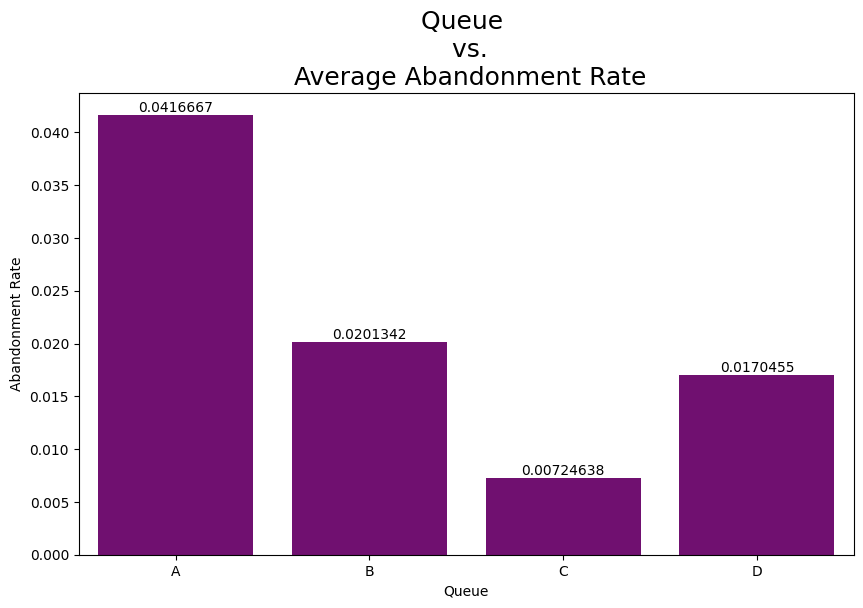

In [20]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sns

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
#print(queue_dict)
print(abandonment_rates)

plt.figure(figsize=(10,6))
# queue v/s avg abandonment rate
mychart = sns.barplot(data = abandonment_rates, color='purple')

# Set axis labels
plt.title('Queue \n vs.\n Average Abandonment Rate',fontdict = { 'fontsize': 18})
plt.xlabel(str("Queue"))
plt.ylabel(str("Abandonment Rate"))

for i in mychart.containers:
    mychart.bar_label(i,)
 
# Show the plot
plt.show()


##### Record your answer below:

> Chart style you chose and why: I choose the bar plot chart style to visualize the data because I wanted a clear display of all 4 queues side by side to compare their rates.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

   Rep ID  Incoming Wait Time
0  Amanda            2.400000
1    Andy            3.600000
2   Brent            2.125000
3     Cam            2.909091
4    Duke            2.785714
5     Joe            3.600000
6   Lilly            3.083333
7    Todd            3.500000
8  Xander            3.333333


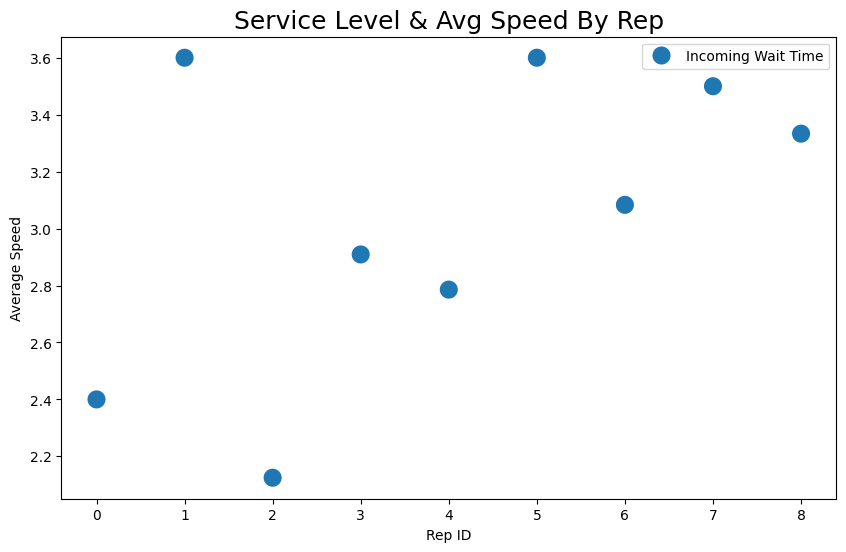

In [21]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
print(north_plt)

plt.figure(figsize=(10,6))

sns.scatterplot(s=200, data = north_plt)

# Set axis labels
plt.title('Service Level & Avg Speed By Rep',fontdict = { 'fontsize': 18})
plt.xlabel(str("Rep ID"))
plt.ylabel(str("Average Speed"))

plt.show()

##### Record your answer below:

> Chart style you chose and why: I choose to use a seaborn scatterplot chart type because their were multiple variables to track for every representative.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

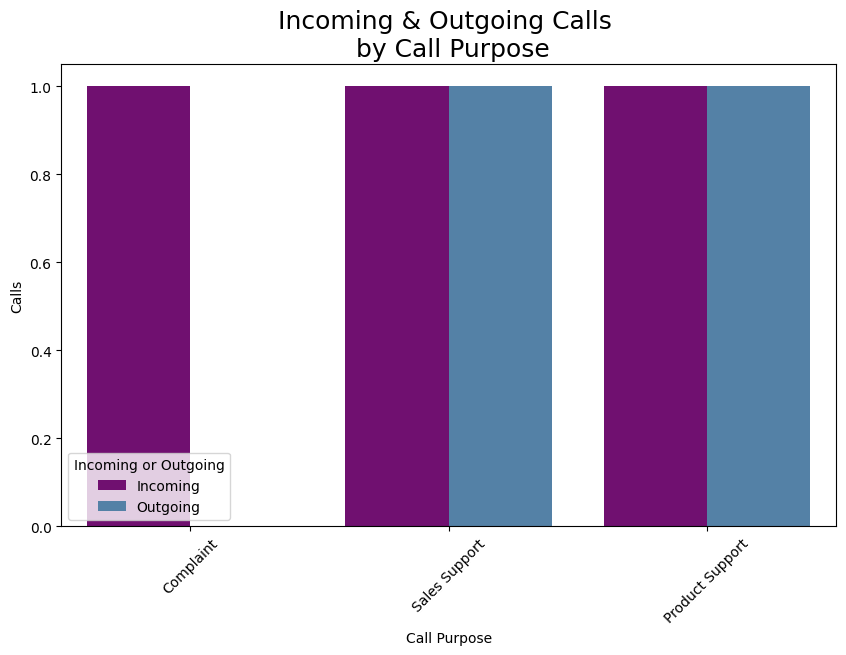

In [22]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()


complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

# Set Size
plt.figure(figsize=(10,6))

#create grouped bar chart
sns.barplot(x='Call Purpose', y='Calls', hue='Incoming or Outgoing', data=df, palette=['purple', 'steelblue']) 
plt.title('Incoming & Outgoing Calls \n by Call Purpose',fontdict = { 'fontsize': 18})
plt.xticks(rotation=45)

plt.show()

##### Record your answer below:

> Chart style you chose and why: 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 
After my analysis I believe the branch that is operating the most efficiently is the South Branch. Specifically, this branch has the lower average abandonment rate at 1.27% and the branch's average answer speed is quicker at 3.0%. After analysis these statistics show that the South Branch is the more efficient call center.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 
Based on the number of reps in each branch 9 in the North center and 11 in the South center and the number of calls each branch handles, I think that the North branch would benefit from the extra help.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 
I wish I had more historical for both branches so I could compare and determine trends.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [23]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: